In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/25/2020,488.190002,492.470001,485.089996,490.579987,490.579987,5727700
1,8/26/2020,492.500000,549.039978,492.079987,547.530029,547.530029,20373700
2,8/27/2020,537.780029,541.000000,521.250000,526.270020,526.270020,9062900
3,8/28/2020,532.000000,539.000000,522.000000,523.890015,523.890015,4417500
4,8/31/2020,521.159973,531.989990,517.580017,529.559998,529.559998,4941400
5,9/1/2020,532.599976,557.390015,532.450012,556.549988,556.549988,9572700


In [3]:
df.tail(6)

,Date,Open,High,Low,Close,Adj Close,Volume
247,8/18/2021,520.000000,526.380005,518.650024,521.869995,521.869995,2582000
248,8/19/2021,522.739990,548.390015,521.869995,543.710022,543.710022,7497300
249,8/20/2021,545.090027,551.390015,539.099976,546.880005,546.880005,3774300
250,8/23/2021,545.979980,555.549988,543.739990,553.330017,553.330017,2602000
251,8/24/2021,551.479980,555.309998,549.270020,553.409973,553.409973,2108500
252,8/25/2021,550.159973,552.840027,545.450012,547.549988,547.549988,1269663


In [4]:
df.shape

(253, 7)

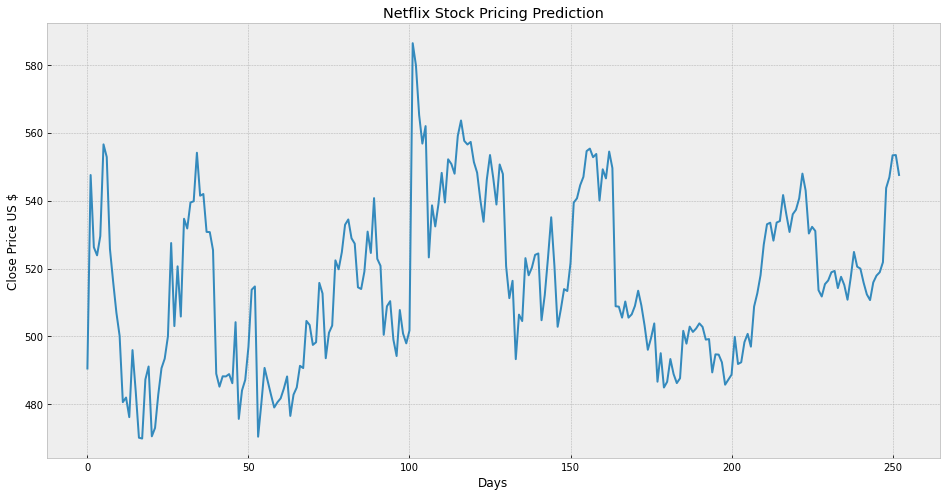

In [5]:
plt.figure(figsize=(16,8))
plt.title('Netflix Stock Pricing Prediction')
plt.xlabel('Days')
plt.ylabel('Close Price US $')
plt.plot(df['Close'])
plt.show()

In [6]:
df = df[['High','Low','Open','Close']]
df.head(4)

,High,Low,Open,Close
0,492.470001,485.089996,488.190002,490.579987
1,549.039978,492.079987,492.500000,547.530029
2,541.000000,521.250000,537.780029,526.270020
3,539.000000,522.000000,532.000000,523.890015


In [7]:
future_days=51
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,High,Low,Open,Close,Prediction
0,492.470001,485.089996,488.190002,490.579987,513.76001
1,549.039978,492.079987,492.500000,547.530029,514.72998
2,541.000000,521.250000,537.780029,526.270020,470.50000
3,539.000000,522.000000,532.000000,523.890015,480.23999


In [8]:
df

,High,Low,Open,Close,Prediction
0,492.470001,485.089996,488.190002,490.579987,513.76001
1,549.039978,492.079987,492.500000,547.530029,514.72998
2,541.000000,521.250000,537.780029,526.270020,470.50000
3,539.000000,522.000000,532.000000,523.890015,480.23999
4,531.989990,517.580017,521.159973,529.559998,490.76001
...,...,...,...,...,...
248,548.390015,521.869995,522.739990,543.710022,NaN
249,551.390015,539.099976,545.090027,546.880005,NaN
250,555.549988,543.739990,545.979980,553.330017,NaN
251,555.309998,549.270020,551.479980,553.409973,NaN


In [37]:
X = df[['High','Low','Open']][:-future_days]
print(X)

           High         Low        Open
0    492.470001  485.089996  488.190002
1    549.039978  492.079987  492.500000
2    541.000000  521.250000  537.780029
3    539.000000  522.000000  532.000000
4    531.989990  517.580017  521.159973
..          ...         ...         ...
197  498.820007  489.369995  497.000000
198  496.089996  484.649994  494.500000
199  490.209991  482.140015  487.170013
200  491.410004  487.779999  490.000000
201  503.500000  486.910004  489.679993

[202 rows x 3 columns]


In [38]:
#create the target data set (y) and convert it into the numpy
Y = (df['Prediction'])[:-future_days]
print(Y)

0      513.760010
1      514.729980
2      470.500000
3      480.239990
4      490.760010
          ...    
197    543.710022
198    546.880005
199    553.330017
200    553.409973
201    547.549988
Name: Prediction, Length: 202, dtype: float64


In [39]:
#split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [40]:
#create the models
tree = DecisionTreeRegressor().fit(X_train, Y_train)
lr = LinearRegression().fit(X_train, Y_train)

In [54]:
tree_prediction = tree.predict(X_test)
print(tree_prediction)
print()
lr_prediction = lr.predict(X_test)
print(lr_prediction)

[510.299988 500.859985 535.97998  548.159973 537.309998 500.859985
 541.640015 539.039978 501.769989 557.280029 524.830017 533.539978
 523.280029 540.72998  506.440002 502.859985 533.539978 547.919983
 503.859985 535.97998  515.919983 512.179993 586.340027 513.969971
 490.700012 513.969971 513.469971 550.640015 548.219971 491.899994
 523.280029 502.359985 510.399994 510.299988 497.890015 514.47998
 509.109985 512.400024 494.25     500.859985 520.25     557.590027
 498.309998 510.399994 486.690002 533.539978 550.640015 480.630005
 557.590027 499.100006 546.150024]

[517.15180572 518.05653643 521.32000992 524.62227222 523.0886715
 513.32246015 518.62913588 525.61523201 523.57486291 516.68739523
 518.91993418 516.72140306 521.9085748  519.47353472 521.24031929
 520.88131342 516.51754182 522.66615776 517.59402135 518.715257
 522.28696512 521.46392826 521.30916415 516.77781956 520.54665152
 516.27950032 517.17623205 518.64518591 520.47717821 520.47631134
 521.16486015 522.25034007 523.34761

In [55]:
print(X_test)

           High         Low        Open
105  567.989990  554.059998  554.729980
177  503.149994  486.109985  502.000000
94   513.239990  504.510010  511.309998
48   486.299988  475.000000  478.869995
176  508.549988  501.119995  504.619995
11   506.290009  478.839996  503.350006
52   515.210022  502.510010  515.000000
64   484.049988  475.890015  478.839996
62   494.760010  481.570007  485.220001
46   513.900024  479.339996  488.500000
9    522.000000  495.000000  498.399994
119  563.630005  552.729980  557.289978
19   491.820007  479.260010  489.010010
32   544.280029  535.000000  537.830017
79   527.380005  517.690002  520.109985
170  509.290009  499.000000  507.600006
118  561.250000  550.849976  556.940002
57   488.940002  477.799988  486.769989
89   545.500000  523.150024  525.530029
92   513.099976  499.500000  511.970001
99   506.320007  495.100006  500.000000
150  528.130005  515.440002  515.669983
97   512.349976  493.010010  495.500000
5    557.390015  532.450012  532.599976


<ipython-input-56-295be2ee22a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


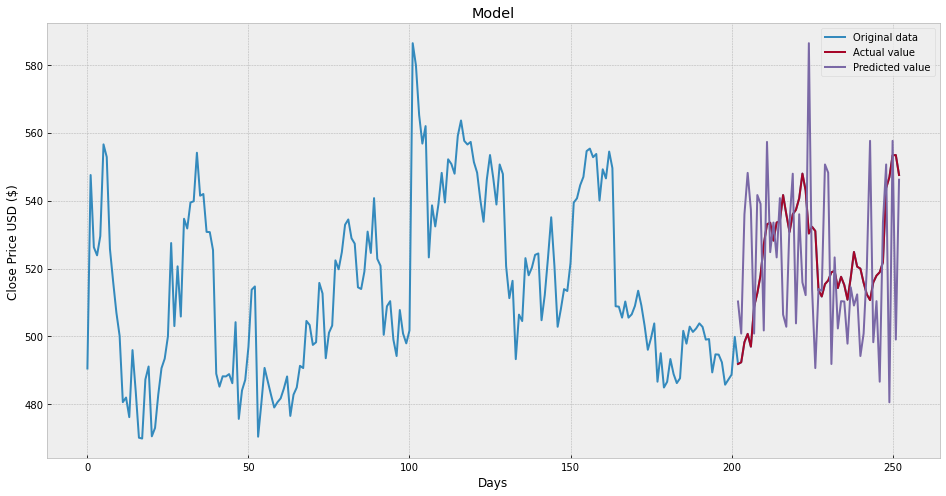

In [56]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original data', 'Actual value', 'Predicted value'])
plt.show()

In [57]:
tree.score(X_test,Y_test)

-0.8237284417979653

<ipython-input-58-eb609ffcdbcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


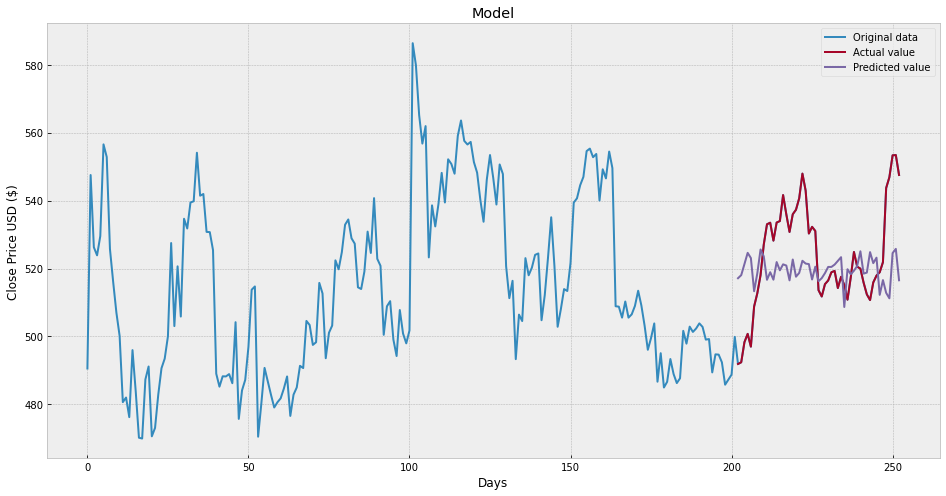

In [58]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original data', 'Actual value', 'Predicted value'])
plt.show()

In [59]:
lr.score(X_test,Y_test)

0.018797131399035605

In [60]:
import pickle

In [64]:
pickle.dump(tree, open('NFLX.pkl','wb'))

In [65]:
loadedModel = pickle.load(open('NFLX.pkl','rb'))

In [66]:
loadedModel.predict([[23,34,55]])

array([490.700012])